In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

sns.set_style("white")

In [118]:
directory = '2CW100/0925/C2CW100_25-Sep-2016 09_22_05.csv'
col_names = ['Interval', 'x', 'y', 'Area', 'Hour', 'Min', 'Sec']
df = pd.read_csv(directory, header=None, names=col_names)



In [119]:
def get_day_frame(directory):
    """
    Returns the day frame for all files in the directory
    """
    files = os.listdir(directory)
    frames = []
    for filename in files:
        path = directory + filename
        frames.append(pd.read_csv(path, header=None, names=col_names))

    # Concatenate readings from all files
    day_frame = pd.concat(frames)
    return day_frame
    

In [120]:
day_frame_0925 = get_day_frame('2CW100/0925/')
day_frame_0925 = day_frame_0925.reset_index()

In [121]:
# Drop rows with (0,0) coordinates
frame_0925_nozeros = day_frame_0925[(day_frame_0925['x'] != 0) & (day_frame_0925['y'] != 0)]



In [126]:
ax[(0,0)]

In [98]:
# Quick visualization
def visualize_hour(hour):
    frame_hour = day_frame[day_frame['Hour'] == hour]

    # Drop rows with (0,0) coordinates
    frame_hour_nozeros = frame_hour[(frame_hour['x'] != 0) & (frame_hour['y'] != 0)]

    plt.plot(frame_hour_nozeros['x'], frame_hour_nozeros['y'])




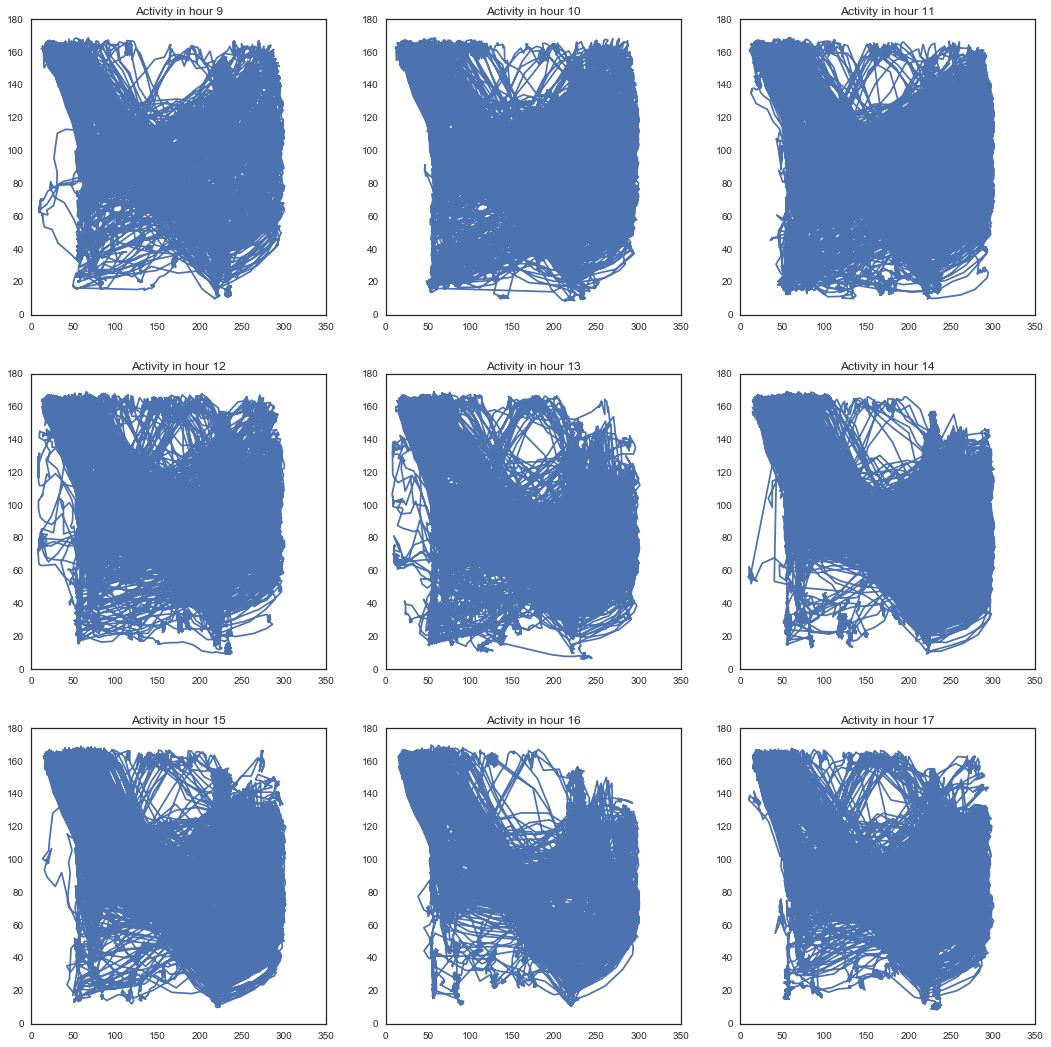

In [131]:
fig, ax = plt.subplots(3, 3, figsize=(18,18))
ax_pos = [(x,y) for x in range(3) for y in range(3)] # list all positions on the grid

hour = 9
for coord in ax_pos:
    hour_frame = frame_0925_nozeros[frame_0925_nozeros['Hour'] == hour]
    ax[coord].plot(hour_frame['x'], hour_frame['y'])
    ax[coord].set_title('Activity in hour ' + str(hour))
    
    hour += 1